# 확률분포의 종류
- 이항분포
      binom
- 다항분포
      multinomial
- 정규분포
      norm
- 균일분포
      uniform
- 베타분포
      beta
- 감마분포
      gamma
- t - 분포
      t
- 카이제곱분포
      chi2

## 모수 지정
평균, 편차

분포의 기대값, 표준편차

      pdf : 확률밀도함수
      pmf : 확률질량함수
      cdf : 누적확률밀도함수
      ppf : cdf의 역함수

In [2]:
import scipy as sp
import scipy.stats
import numpy as np
rv = scipy.stats.norm(1, 2)

In [3]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

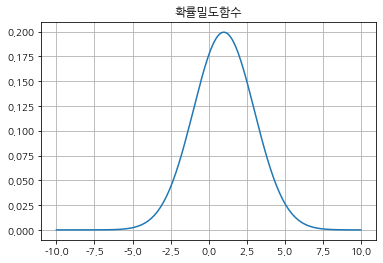

In [4]:
x = np.linspace(-10, 10, 200)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.title('확률밀도함수')
plt.grid()
plt.show()

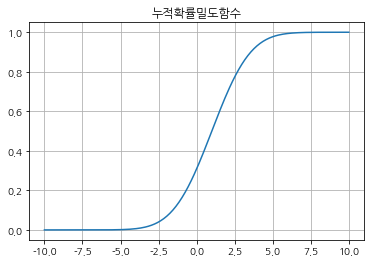

In [5]:
cdf = rv.cdf(x)
plt.plot(x, cdf)
plt.title('누적확률밀도함수')
plt.grid()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


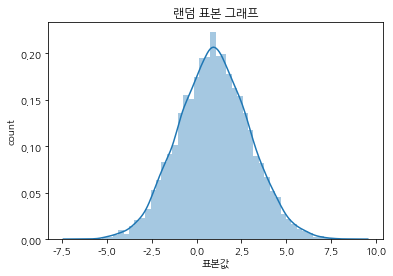

In [6]:
# random value sampling
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title('랜덤 표본 그래프')
plt.xlabel('표본값')
plt.ylabel('count')
plt.show()

변환 확률 변수의 시뮬레이션

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


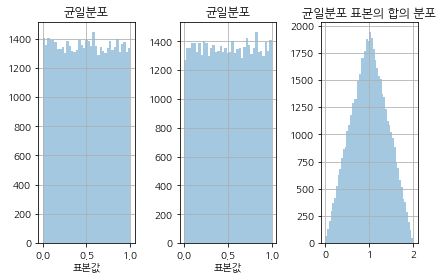

In [7]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)

x_3 = x_1 + x_2

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.grid()
plt.title('균일분포')
plt.xlabel('표본값')

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.grid()
plt.title('균일분포')
plt.xlabel('표본값')

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title('균일분포 표본의 합의 분포')
plt.grid()
plt.tight_layout()
plt.show()

### 베르누이 분포
      bernoulli
      베르누이 실험 : 결과가 두개 밖에 없는 실험(동전)
      베르누이의 확률변수 : 이산확률변수 {0,1}, {-1,1}
$$Bern(x;μ)={μ^x}{(1-μ)^{(1-x)}}$$

In [8]:
mu = 0.6
rv = scipy.stats.bernoulli(mu)
rv

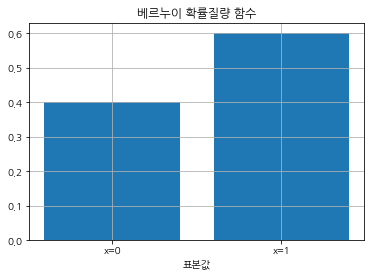

In [9]:
x = [0, 1]
plt.bar(x, rv.pmf(x))
plt.xticks([0,1], ['x=0','x=1'])
plt.grid()
plt.xlabel('표본값')
plt.title('베르누이 확률질량 함수')
plt.show()

In [10]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


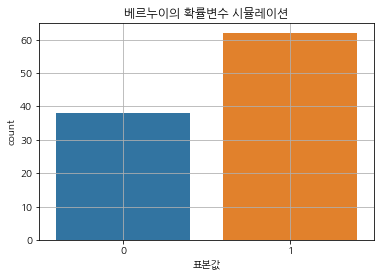

In [11]:
sns.countplot(x)
plt.title('베르누이의 확률변수 시뮬레이션')
plt.xlabel('표본값')
plt.grid()
plt.show()

In [12]:
import pandas as pd
y = np.bincount(x, minlength=2)/float(len(x))
df = pd.DataFrame({'이론':rv.pmf([0,1]), '시뮬레이션' : y})
df.index = [0,1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [13]:
for i in range(200):
  x = rv.rvs(i, random_state=0)
  y = np.bincount(x, minlength=2)/float(len(x))
  print(f'표본 수가 {i}개 일때 이론값 : {rv.pmf([0,1])}, 표본값 : {y}')


C:\Users\user\AppData\Local\Temp\ipykernel_4992\3206596756.py:3: RuntimeWarning: invalid value encountered in true_divide
  y = np.bincount(x, minlength=2)/float(len(x))


표본 수가 0개 일때 이론값 : [0.4 0.6], 표본값 : [nan nan]
표본 수가 1개 일때 이론값 : [0.4 0.6], 표본값 : [0. 1.]
표본 수가 2개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 3개 일때 이론값 : [0.4 0.6], 표본값 : [0.66666667 0.33333333]
표본 수가 4개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 5개 일때 이론값 : [0.4 0.6], 표본값 : [0.4 0.6]
표본 수가 6개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 7개 일때 이론값 : [0.4 0.6], 표본값 : [0.42857143 0.57142857]
표본 수가 8개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 9개 일때 이론값 : [0.4 0.6], 표본값 : [0.55555556 0.44444444]
표본 수가 10개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 11개 일때 이론값 : [0.4 0.6], 표본값 : [0.54545455 0.45454545]
표본 수가 12개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 13개 일때 이론값 : [0.4 0.6], 표본값 : [0.46153846 0.53846154]
표본 수가 14개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 15개 일때 이론값 : [0.4 0.6], 표본값 : [0.46666667 0.53333333]
표본 수가 16개 일때 이론값 : [0.4 0.6], 표본값 : [0.4375 0.5625]
표본 수가 17개 일때 이론값 : [0.4 0.6], 표본값 : [0.41176471 0.58823529]
표본 수가 18개 일때 이론값 : [0.4 0.6], 표본값 : [0.44444444 0.55555556]
표본 수가 19개 일때 이론값 : [

### 이항분포
베르누이 분포에서 실험을 여러번 한 것이 이항분포

$$ X∼Bin(x;N,μ)$$

표본 중 성공일 경우 1 아닐경우 0

N개의 표본 중 성공 횟수는 N개의 표본을 모두 더한 것과 같다.
$$x=\Sigma{y_i}$$

확률 질량 함수
$$Bin(x;N,μ) = \binom{N}{x}{μ^x}{(1-μ)^{(N-x)}}$$

In [14]:
N = 10
mu = 0.6
rv = scipy.stats.binom(N, mu)

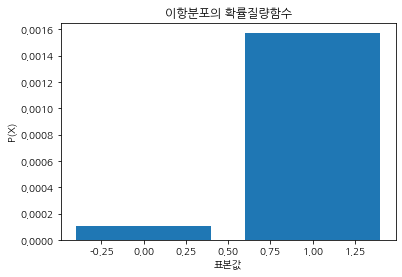

In [15]:
x_ = np.arange(N + 1)
plt.bar(x, rv.pmf(x), align='center')
plt.title('이항분포의 확률질량함수')
plt.xlabel('표본값')
plt.ylabel('P(X)')
plt.show()

이항분포 시뮬레이션

In [16]:
np.random.seed(0)
x = rv.rvs(1000)
# x

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


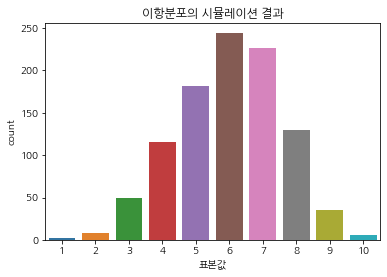

In [17]:
sns.countplot(x)
plt.title('이항분포의 시뮬레이션 결과')
plt.xlabel("표본값")
plt.show()

In [18]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({'이론':rv.pmf(x_), '시뮬레이션':y}).stack()

In [19]:
df = df.reset_index()
df.columns = ['표본값','유형','비율']

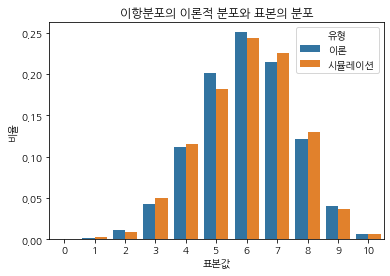

In [20]:
sns.barplot(x='표본값', y='비율', hue='유형', data=df)
plt.title('이항분포의 이론적 분포와 표본의 분포')
plt.show()

### 정규분포
가우스 분포라고도 함
보통 자연현상에 나타나는 수치 정규분포 가정을 많이 함

$$ N(x;μ,{q^2}) = \frac{1}{{(2π{q^2})}^\frac{1}{2}}exp(-\frac{{(x-μ)}^2}{2{q^2}})$$

In [21]:
mu = 0
std = 1
rv = scipy.stats.norm(mu, std)

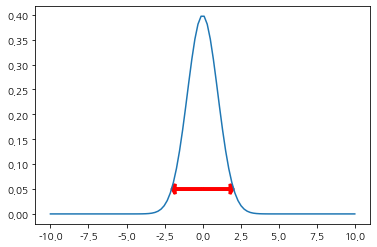

In [22]:
x_ = np.linspace(-10,10, 100)
plt.plot(x_, rv.pdf(x_))
plt.arrow(0,0.05,2,0, lw=3, color='r', head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0,0.05,-2,0, lw=3, color='r', head_width=0.02, head_length=0.2, length_includes_head=True)
plt.show()

In [23]:
np.random.seed(0)
x = rv.rvs(100000)
# x

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


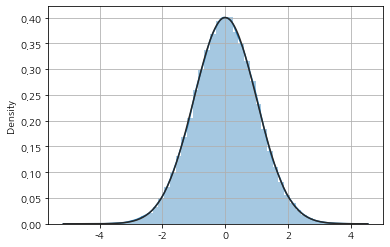

In [24]:
# 표본 생성 결과
sns.distplot(x, fit=scipy.stats.norm)
plt.grid()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


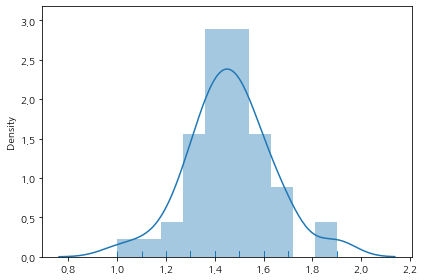

In [25]:
from sklearn.datasets import load_iris

setosa_sepal_length = load_iris().data[:50,2]
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.show()

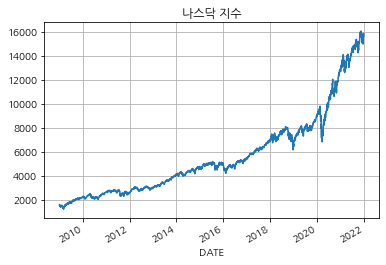

In [26]:
import pandas_datareader.data as web

symbol = 'NASDAQCOM'
data = web.DataReader(symbol, data_source='fred', start='2009-01-01', end='2021-12-31')[symbol]
data = data.dropna()
data.plot(legend=False)
plt.grid()
plt.title('나스닥 지수')
plt.show()

In [27]:
daily_returns = data.pct_change().dropna()
mean = daily_returns.mean()
std = daily_returns.std()
mean*100, std* 100

(0.0771667570778693, 1.2696322228964456)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


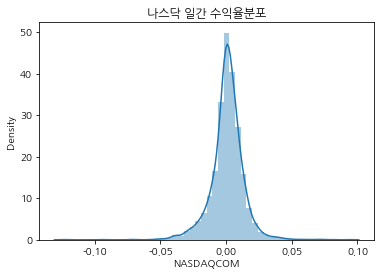

In [28]:
sns.distplot(daily_returns, kde=True)
plt.title('나스닥 일간 수익율분포')
plt.show()

로그정규 분포

항상 양수인 데이터 가정할 수 있는 분포

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


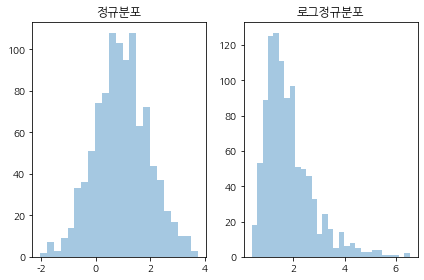

In [29]:
np.random.seed(0)
mu = 1
rv = scipy.stats.norm(mu)
x1 = rv.rvs(1000)
s = .5
x2 = np.exp(s * x1)
fig, ax = plt.subplots(1,2)
sns.distplot(x1, kde=False, ax= ax[0])
ax[0].set_title('정규분포')
sns.distplot(x2, ax=ax[1], kde= False)
ax[1].set_title('로그정규분포')
plt.tight_layout()
plt.show()

## Q-Q 플롯

어떤 확률변수의 분포가 정규분포인지 검사하는 그래프

정규분포를 따를 때 Q-Q플롯은 직선의 형태를 가집니다. 

정규분포를 따르지 않을 때 Q-Q플롯은 곡선이 발생

In [30]:
mu = 0
std = 1
rv = scipy.stats.norm(mu, std)

In [31]:
x = rv.rvs(10000)
x_sorted = np.sort(x)
x_sorted

array([-3.74010064, -3.39229999, -3.12620148, ...,  3.42753855,
        3.45717889,  3.80166021])

In [32]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

In [33]:
position = _calc_uniform_order_statistic_medians(len(x))

In [34]:
position

array([6.93123158e-05, 1.68243859e-04, 2.68240209e-04, ...,
       9.99731760e-01, 9.99831756e-01, 9.99930688e-01])

In [35]:
ff = rv.ppf(position)
ff

array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
        3.58545756,  3.81060943])

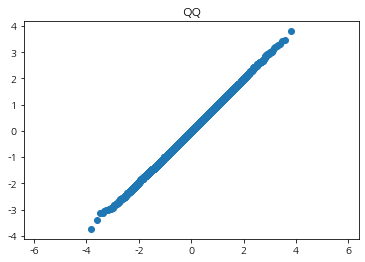

In [36]:
plt.scatter(ff, x_sorted)
plt.title('QQ')
plt.axis('equal')
plt.show()

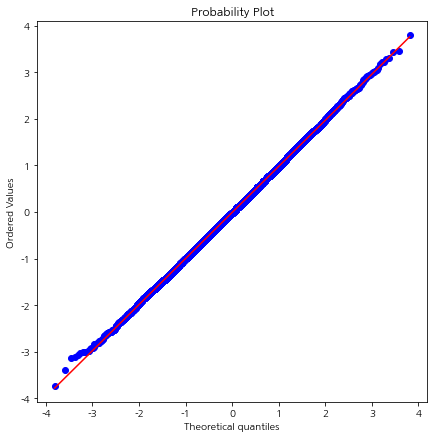

In [37]:
np.random.seed(0)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis('equal')
plt.show()

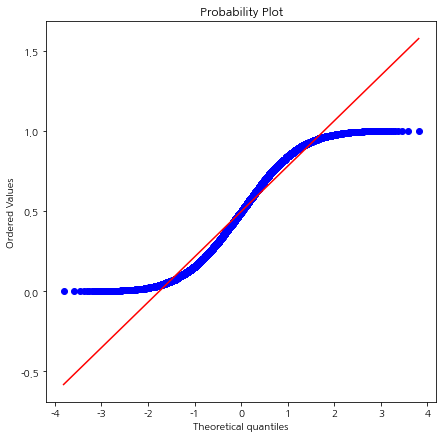

In [38]:
np.random.seed(0)
x = np.random.rand(10000)
plt.figure(figsize=(7,7))
scipy.stats.probplot(x, plot=plt)
plt.show()

In [39]:
petal_width = load_iris().data[:,3]

In [40]:
petal_width

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

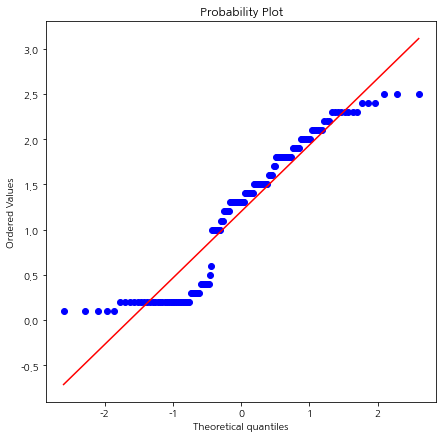

In [41]:
plt.figure(figsize=(7,7))
sp.stats.probplot(petal_width, plot =plt)
plt.show()

### 중심 극한 정리

여러개의 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상

확률변수의 평균들의 평균은 확률변수의 수가 무한히 많아지게 되면 모집단의 평균과 분산이 된다.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

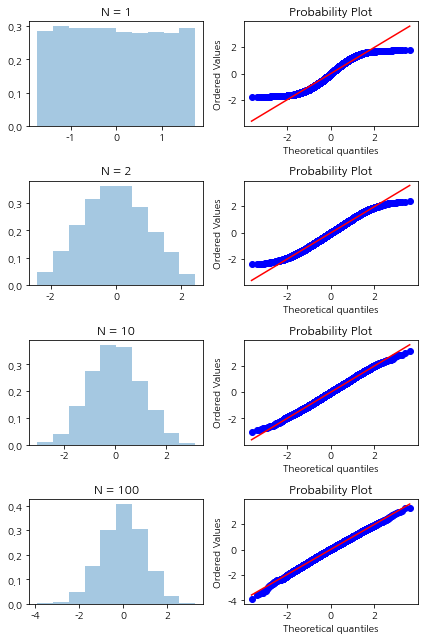

In [42]:
np.random.seed(0)
xx = np.linspace(-2,2,100)

plt.figure(figsize=(6,9))

for i, N in enumerate([1,2,10, 100]):
  X = np.random.rand(5000, N)
  Xbar = (X.mean(axis=1)-0.5)*np.sqrt(12*N)
  ax = plt.subplot(4,2,2*i+1)
  sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
  ax.set_title(f'N = {N}')
  plt.subplot(4,2,2*i+2)
  sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()


### 스튜던트 t분포

정규분포에서 양끝단의 분포가 많아지는 분포를 t분포(fat tail 현상)

정규분포와 유사하지만 왼쪽오른쪽 부분이 더길고 두꺼움

정규분포의 평균을 찾을 때 활용되고, 주로 표본의 크기가 작으을 때 주로 사용되는 분포

표본의 크기가 작을 수록 정규분포와 가까워집니다.

- t분포의 기댓값
      정규분포와 동일 평균

- t분포의 분산
$$Var[X]=\frac{v}{λ(v-2)}$$

In [43]:
# import panads_datareader.data as web
import pandas_datareader.data as web
symbols = ['SP500','NASDAQCOM','DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
  data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()

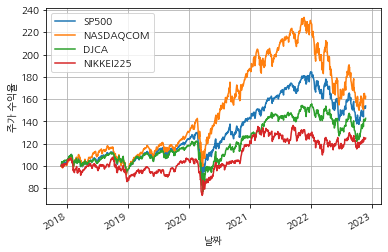

In [44]:
(data/data.iloc[0]*100).plot()
plt.xlabel('날짜')
plt.ylabel('주가 수익율')
plt.grid()
plt.show()

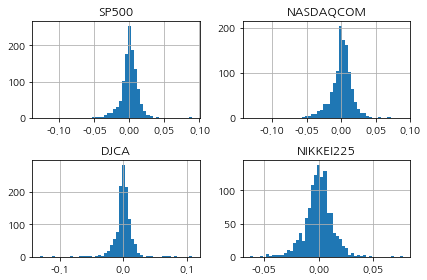

In [45]:
log_returns = np.log(data/data.shift(1))
log_returns.hist(bins=50)
plt.tight_layout()
plt.show()

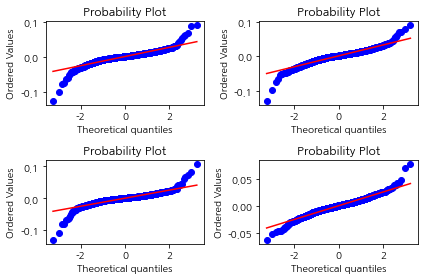

In [46]:
for i, sym in enumerate(symbols):
  ax = plt.subplot(2, 2, i+1)
  sp.stats.probplot(log_returns[sym].dropna(),plot=ax)
plt.tight_layout()
plt.show()

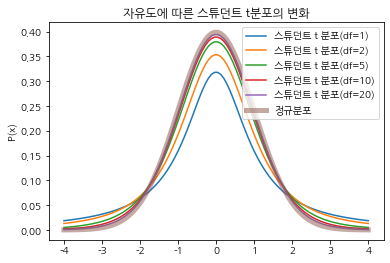

In [47]:
xx = np.linspace(-4,4,100)
for df in [1, 2, 5, 10, 20]:
  rv = sp.stats.t(df=df)
  plt.plot(xx, rv.pdf(xx), label=f'스튜던트 t 분포(df={df})')
plt.plot(xx, sp.stats.norm().pdf(xx), label='정규분포', lw=5, alpha=0.5)
plt.title('자유도에 따른 스튜던트 t분포의 변화')
plt.ylabel('P(x)')
plt.legend()
plt.show()

### 카이제곱 분포
얼마나 특별한 사건이 일어나는지를 확인하는 분포

t분포와는 다르게 제곱을해서 양수값만 가지도록 만든것이 카이제곱 분포

표본 분포가 모분포를 잘 반영하는지 알아낼 때 사용하는 분ㄴ포

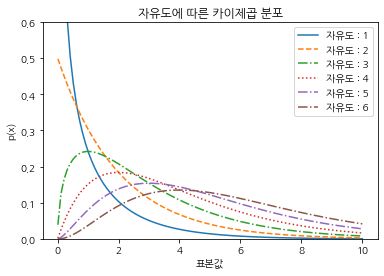

In [48]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1,7)
lss = ['-','--','-.',':','-.','-.']

for df, ls in zip(dfs, lss):
  rv = scipy.stats.chi2(df=df)
  plt.plot(xx, rv.pdf(xx), ls=ls, label=f"자유도 : {df}")
plt.title('자유도에 따른 카이제곱 분포')
plt.ylim(0,0.6)
plt.xlabel('표본값')
plt.ylabel('p(x)')
plt.legend()
plt.show()

### F-분포
여러 집단에 대해서 각 집단의 평균이 의미있게 차이가 나는지 측정 할 때 사용됩니다.   
선형 회귀 분석에 회귀분석모델이 전체 데이터 변동을 잘 설명하고 있는지 비교하기 위해서 사용됩니다.

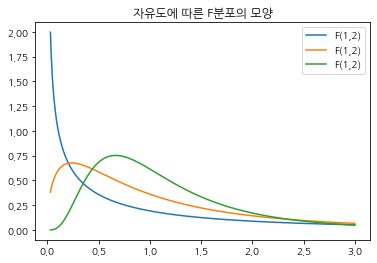

In [49]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, scipy.stats.f(1,2).pdf(xx), ls = '-', label='F(1,2)')
plt.plot(xx, scipy.stats.f(3,5).pdf(xx), ls = '-', label='F(1,2)')
plt.plot(xx, scipy.stats.f(10,10).pdf(xx), ls = '-', label='F(1,2)')
plt.title('자유도에 따른 F분포의 모양')
plt.legend()
plt.show()

## 확률분포의 결정

확률변수가 베르누이, 이항, 정규분포중에 어떤 확률분포를 따르는지 알아내고
표본집단의 해당 확률분포의 모수 값을 구하는 작업 합니다.

- 데이터가 0, 1뿐이면 -> 베르누이 분포
- 데이터가 카테고리 값일 경우 -> 카테고리 분포
- 데이터가 0과 1사이의 실수 값일 경우 -> 베타분포
- 데이터가 항상 0이상일 경우 -> 로그정규분포, 감마분포, f분포, 카이제곱분포, 지수 등등
- 데이터가 제한이없고 연속된 실수일 경우 -> 정규분포, 스튜던트 t-분포, 라플라스 분포 등등

데이터의 특성을 알면 어떤 분포를 따를지 추측이 가능하다.